In [82]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import Normalize
from scipy.interpolate import make_interp_spline


def normal_pdf(x, mean, var):
    return np.exp(-(x - mean)**2 / (2*var))

def create_normal_pdf(mean, min, max, var, n=100):
    x = np.linspace(min, max, n)
    y = normal_pdf(x, mean, var)
    return x, y

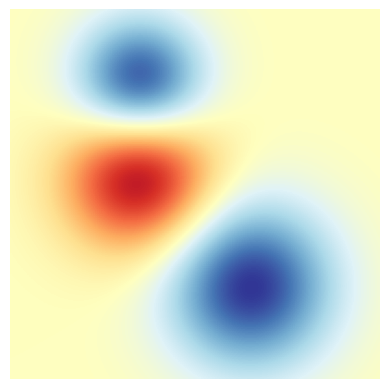

In [134]:
# Generate the space in which the blobs will live
xmin, xmax, ymin, ymax = (0, 200, 0, 200)
n_bins = 200
xx = np.linspace(xmin, xmax, n_bins)
yy = np.linspace(ymin, ymax, n_bins)

# Generate the blobs. The range of the values is roughly -.0002 to .0002
means_0 = [70, 40] # h 
means_1 = [70, 90] # O
means_2 = [130, 150] # h
c = 4
var = [150 * c, 200 * c, 250 * c]  # variance
gauss_x_0 = create_normal_pdf(means_0[0], xmin, xmax, var[0], n_bins)[1]
gauss_y_0 = create_normal_pdf(means_0[1], ymin, ymax, var[0], n_bins)[1]
gauss_x_1 = create_normal_pdf(means_1[0], xmin, xmax, var[1], n_bins)[1]
gauss_y_1 = create_normal_pdf(means_1[1], ymin, ymax, var[1], n_bins)[1]
gauss_x_2 = create_normal_pdf(means_2[0], xmin, xmax, var[2], n_bins)[1]
gauss_y_2 = create_normal_pdf(means_2[1], ymin, ymax, var[2], n_bins)[1]

weights = (np.outer(gauss_x_0, gauss_y_0) + np.outer(gauss_x_2, gauss_y_2)
           - np.outer(gauss_x_1, gauss_y_1))

# We'll also create a grey background into which the pixels will fade
greys = np.full((*weights.shape, 3), 200, dtype=np.uint8)

# First we'll plot these blobs using ``imshow`` without transparency.
vmax = np.abs(weights).max()
imshow_kwargs = {
    'vmax': vmax,
    'vmin': -vmax,
    'cmap': 'RdYlBu',
    'extent': (xmin, xmax, ymin, ymax),
}

fig, ax = plt.subplots()
ax.imshow(greys)
ax.imshow(weights.T, **imshow_kwargs)
ax.set_axis_off()

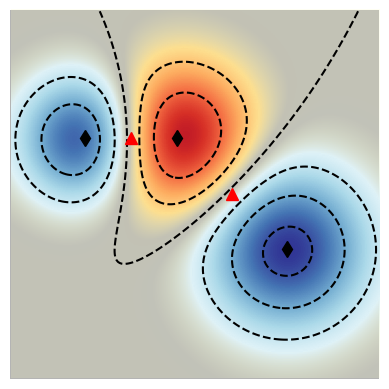

In [161]:
# Create an alpha channel based on weight values
# Any value whose absolute value is > .0001 will have zero transparency
greys = np.full((*weights.shape, 3), 180, dtype=np.uint8)
alphas = Normalize(0, .2, clip=True)(np.abs(weights))
alphas = np.clip(alphas, .2, 1)  # alpha value clipped at the bottom at .4

# Create the figure and image
# Note that the absolute values may be slightly different
fig, ax = plt.subplots()
ax.imshow(greys)
ax.imshow(weights, alpha=alphas, **imshow_kwargs)
ax.contour(weights[::-1], levels=6, colors='k', linestyles='--')

# add square tick at center of each gaussian
ax.plot(means_0[1], 200-means_0[0], 'd', color='black', markersize=8)
ax.plot(means_1[1], 200-means_1[0], 'd', color='black', markersize=8)
ax.plot(means_2[1], 200-means_2[0], 'd', color='black', markersize=8)
# add tick at mean between gaussians
ax.plot((means_0[1] + means_1[1]) / 2, 200-(means_0[0] + means_1[0]) / 2, '^', color='red', markersize=8)
ax.plot((means_1[1] + means_2[1]) / 2, 200-(means_1[0] + means_2[0]) / 2, '^', color='red', markersize=8)


# Add contour lines to further highlight different levels.
ax.set_axis_off()
plt.show()


#ax.set_axis_off()
#plt.show()

In [160]:
# save high quality image
fig.savefig('test.png', dpi=300, bbox_inches='tight', pad_inches=0)